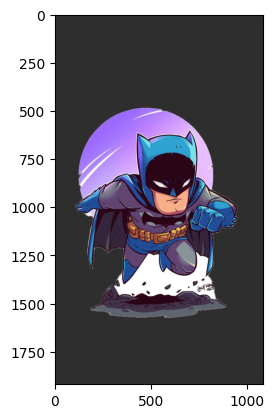

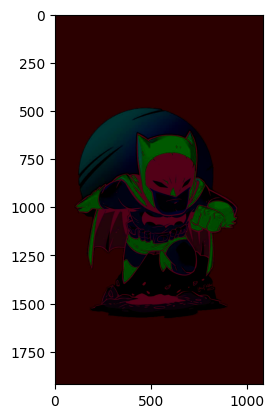

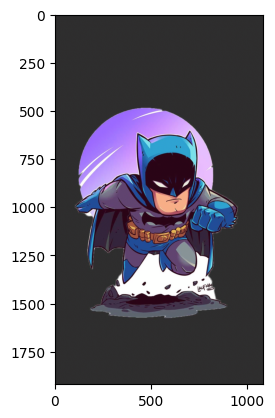

Reconstruction Loss: 4992.653633645892


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "/content/batman.jpg"  # Replace with the path to your image
img = Image.open(image_path).convert('RGB')
img = np.array(img)

# Display the original image
plt.imshow(img)
plt.show()

# Reshape the image data
img_data = img.reshape(-1, 3)

# Perform PCA
mu = np.mean(img_data, axis=0)
img_data = img_data - mu
cov_matrix = np.cov(img_data.T)
eig_values, eig_vec = np.linalg.eig(cov_matrix)

# Sort and select the top k eigenvectors
k = 3  # Adjust this value to set the number of principal components
eig_vec = eig_vec[:, np.argsort(eig_values)[::-1]][:, :k]

# Project the image data onto the k principal components
img_com = img_data @ eig_vec
img_reconstructed = img_com @ eig_vec.T

# Reshape the compressed image and the reconstructed image
k_img = img_com.reshape(img.shape[0], img.shape[1], k)
r_img = img_reconstructed.reshape(img.shape) + mu

# Display the compressed image
plt.imshow(k_img / 255)
plt.show()

# Display the reconstructed image
plt.imshow(r_img / 255)
plt.show()

# Calculate and display the reconstruction loss
loss = np.mean((img_data.reshape(img.shape) - r_img) ** 2)
print(f"Reconstruction Loss: {loss}")
